# Double Pendulum system

Consider the system composed of two pendulums of length $l_1,l_2$, and mass $m_1,m_2$ concentrated at one end, respectively. The pivot of the first pendulum is attached to a fix point, that of the second pendulum is attached to the dangling bob of the first pendulum. The system is submitted to a uniform, constant gravitational acceleration field $g$ and evolves without friction.

The generalised coordinates of the system are the angles $\theta_1,\theta_2$ of each pendulum with the vertical downward direction. The standard (Cartesian) coordinates are then given by

\begin{equation*}
\begin{array}{rcl}
x_1 & = & l_1\sin\theta_1\\
y_1 & = & -l_1\cos\theta_1
\end{array}
\hspace{2cm}
\begin{array}{rcl}
x_2 & = & l_1\sin\theta_1+l_2\sin\theta_2\\
y_2 & = & -l_1\cos\theta_1-l_2\cos\theta_2
\end{array}
\end{equation*}

The only active forces are the weights of the form $-\nabla V(m_i,x_i,y_i)$ with $V(m,x,y)=mgy$. Hence the Lagrangian

\begin{eqnarray*}
\mathcal{L} & = &
\underbrace{
\frac{1}{2}m_1l_1^2\dot{\theta}_1^2+\frac{1}{2}m_2(l_1^2\dot{\theta}_1^2+l_2^2\dot{\theta}_2^2+
2l_1l_2\dot{\theta}_1\dot{\theta}_2\cos(\theta_1-\theta_2))
}_{\textrm{kinetic energy}}
\underbrace{
+m_1gl_1\cos\theta_1+m_2g(l_1\cos\theta_1+l_2\cos\theta_2)
}_{-\textrm{potential energy}}\\
& = &
\frac{1}{2}ml_1^2\dot{\theta}_1^2+\frac{1}{2}m_2l_2^2\dot{\theta}_2^2+
m_2l_1l_2\dot{\theta}_1\dot{\theta}_2\cos\Delta+
mgl_1\cos\theta_1+m_2gl_2\cos\theta_2
\end{eqnarray*}

where $m\triangleq m_1+m_2$ and $\Delta\triangleq\theta_1-\theta_2$. After simplification, the equations of the dynamics are given by:

\begin{equation*}
\begin{array}{rrcl}
\left[\frac{\mathbf{d}}{\mathbf{d}t}\frac{\partial\mathcal{L}}{\partial\dot{\theta}_1} = \frac{\partial\mathcal{L}}{\partial\theta_1}\right]
\hspace{.2cm} &
ml_1\ddot{\theta}_1+m_2l_2\ddot{\theta}_2\cos\Delta
& = &
-m_2l_2\dot{\theta}_2^2\sin\Delta-mg\sin\theta_1
\\
\left[\frac{\mathbf{d}}{\mathbf{d}t}\frac{\partial\mathcal{L}}{\partial\dot{\theta}_2} = \frac{\partial\mathcal{L}}{\partial\theta_2}\right]
\hspace{.2cm} &
m_2l_1\ddot{\theta}_1\cos\Delta+m_2l_2\ddot{\theta}_2
& = &
m_2l_1\dot{\theta}_1^2\sin\Delta-m_2g\sin\theta_2
\end{array}
\end{equation*}

which rewrites as

\begin{equation*}
\left\{
\begin{array}{rcl}
ab\ddot{\theta}_1 + \ddot{\theta}_2\cos\Delta & = & u
\\
b\ddot{\theta}_1\cos\Delta + \ddot{\theta}_2 & = & v
\end{array}
\right.
\hspace{1cm}\textrm{where}\hspace{1cm}
\left|
\begin{array}{l}
a \triangleq \frac{m}{m_2}=1+\frac{m_1}{m_2}
\hspace{1cm}
b \triangleq \frac{l_1}{l_2}
\hspace{1cm}
c \triangleq \frac{g}{l_2}
\\
u \triangleq -\dot{\theta}_2^2\sin\Delta-ac\sin\theta_1
\hspace{1cm}
v \triangleq b\dot{\theta}_1^2\sin\Delta-c\sin\theta_2
\end{array}
\right.
\end{equation*}

The solution in $\ddot{\theta}_1,\ddot{\theta}_2$ is therefore

\begin{equation*}
\left\{
\begin{array}{rcl}
\ddot{\theta}_1 & = &
\frac{u-v\cos\Delta}{b(a-\cos^2\Delta)}
\\
\ddot{\theta}_2 & = &
\frac{av-u\cos\Delta}{a-\cos^2\Delta}
\end{array}
\right.
\end{equation*}

Documentation: [here](../doc/_build/html/odesimu.html)

In [1]:
%pylab notebook
# for external animation (less resource consuming), use appropriate backend, e.g. qt5

import logging
from functools import partial
from ipyshow.util import Setup
from ipyshow.odesimu import System
from ipyshow.odesimu.util import logger_hook

Populating the interactive namespace from numpy and matplotlib


## DoublePendulum class

In [2]:
#----------------------------------------------------------------------------------------------------
class DoublePendulum (System):
#----------------------------------------------------------------------------------------------------

  shadowshape = (2,)

  @Setup(
    'G: intensity of the gravitation [m.sec^-2]',
    'L1,L2: lengths of the pendulums [m]',
    'M1,M2: masses of the pendulums [kg]',
  )
  def __init__(self,L1,L2,M1,M2,G):
    self.L1, self.L2, self.M1, self.M2, self.G = L1, L2, M1, M2, G
    def main(t,state,a=1+M1/M2,b=L1/L2,c=G/L2):
      θ1,θ1ʹ,θ2,θ2ʹ = state
      Δ = θ1-θ2
      cosΔ, sinΔ = cos(Δ), sin(Δ)
      u = -square(θ2ʹ)*sinΔ-a*c*sin(θ1)
      v = b*square(θ1ʹ)*sinΔ-c*sin(θ2)
      D = a-square(cosΔ)
      θ1ʺ = (u-v*cosΔ)/(D*b)
      θ2ʺ = (a*v-u*cosΔ)/D
      return array((θ1ʹ,θ1ʺ,θ2ʹ,θ2ʺ))
    self.main = main
    def fordisplay(state):
      θ1,ω1,θ2,ω2 = state
      z1 = L1*array((sin(θ1),-cos(θ1)))
      z2 = z1+L2*array((sin(θ2),-cos(θ2)))
      return (z1,z2),z2
    self.fordisplay = fordisplay

  def display(self,ax,refsize=None,**ka):
    L = 1.05*(self.L1+self.L2)
    ax.set_xlim(-L,L)
    ax.set_ylim(-L,L)
    ax.scatter((0.,),(0.,),c='k',marker='o',s=refsize)
    m1,m2 = self.M1,self.M2
    r = clip(sqrt(m1/m2),1./refsize,refsize)
    sz = (refsize*r,refsize/r)
    diag_l, = ax.plot((),(),'k')
    diag_s = ax.scatter((0,0),(0,0),s=sz,marker='o',c=('b','r'))
    tail_l, = ax.plot((),(),'y')
    ax.set_title(r'trajectory:cahotic')
    def disp(t,live,tail):
      (x1,y1),(x2,y2) = live
      diag_l.set_data((0,x1,x2),(0,y1,y2))
      diag_s.set_offsets(((x1,y1),(x2,y2)))
      tail_l.set_data(tail[:,0],tail[:,1])
    return super().display(ax,disp,**ka)

  @staticmethod
  @Setup(
    'θ1,θ2: angles of the pendulums with downward vertical [deg]',
    'θ1ʹ,θ2ʹ: angular speeds [deg.sec^-1]',
    θ1ʹ=0.,θ2ʹ=0.
  )
  def makestate(θ1,θ1ʹ,θ2,θ2ʹ): return radians((θ1,θ1ʹ,θ2,θ2ʹ))

  @Setup(
    'refsize: average size (area) of the bobs for display [pt^2]',
    taild=5.,refsize=100.,hooks=(partial(logger_hook,logger=logging.getLogger()),)
  )
  def launch(self,*a,**ka): return super().launch(*a,**ka)

In [3]:
Setup.display(DoublePendulum)

**** DoublePendulum.__init__(self, L1, L2, M1, M2, G) ****
    G         : intensity of the gravitation [m.sec^-2]
    L1,L2     : lengths of the pendulums [m]
    M1,M2     : masses of the pendulums [kg]
**** DoublePendulum.launch(self, *a, **ka) ****
    maxtime   (inf       ): total simulation time length [sec]
    srate     (25.0      ): sampling rate [sec^-1]
    taild     (5.0       ): shadow duration [sec]
    hooks     ((functools): tuple of display hooks []
    ini       : initial state []
    refsize   (100.0     ): average size (area) of the bobs for display [pt^2]
**** DoublePendulum.makestate(θ1, θ1ʹ, θ2, θ2ʹ) ****
    θ1,θ2     : angles of the pendulums with downward vertical [deg]
    θ1ʹ,θ2ʹ   (0.0,0.0   ): angular speeds [deg.sec^-1]

<IPython.core.display.Javascript object>


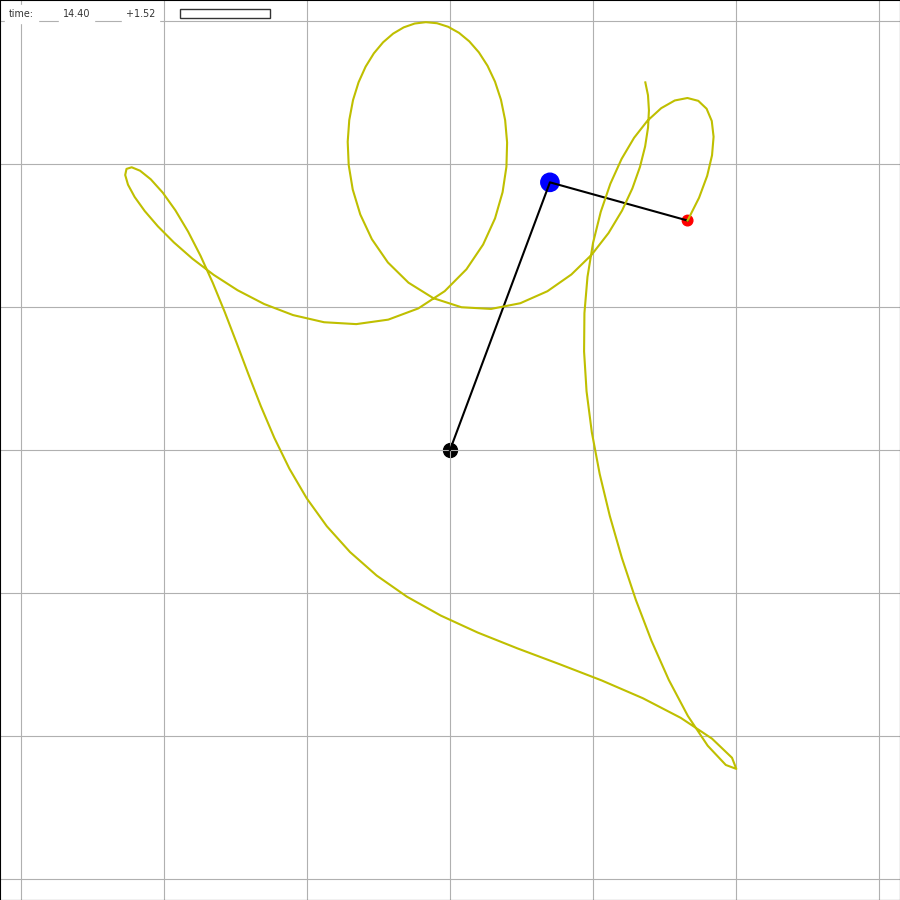

In [4]:
logging.basicConfig(level='WARN') # can be changed dynamically by logger_hook
G = 9.807 # on Earth
#G = 1.622 # on the Moon...
syst = DoublePendulum(M1=3.,L1=4.,M2=1.,L2=2.,G=G)
ini = dict(θ1=180.,θ2=179.,θ1ʹ=45.,θ2ʹ=-45.)
syst.launch(ini=syst.makestate(**ini))